In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


csv_file = "Resources/parking-citations.csv"
citations_df = pd.read_csv(csv_file, low_memory=False)

In [3]:
citations_df.head()

,Ticket number,Issue Date,Issue time,Meter Id,Marked Time,RP State Plate,Plate Expiry Date,VIN,Make,Body Style,Color,Location,Route,Agency,Violation code,Violation Description,Fine amount,Latitude,Longitude
0,1103341116,2015-12-21T00:00:00,1251.0,NaN,NaN,CA,200304.0,NaN,HOND,PA,GY,13147 WELBY WAY,01521,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0
1,1103700150,2015-12-21T00:00:00,1435.0,NaN,NaN,CA,201512.0,NaN,GMC,VN,WH,525 S MAIN ST,1C51,1.0,4000A1,NO EVIDENCE OF REG,50.0,99999.0,99999.0
2,1104803000,2015-12-21T00:00:00,2055.0,NaN,NaN,CA,201503.0,NaN,NISS,PA,BK,200 WORLD WAY,2R2,2.0,8939,WHITE CURB,58.0,6439997.9,1802686.4
3,1104820732,2015-12-26T00:00:00,1515.0,NaN,NaN,CA,NaN,NaN,ACUR,PA,WH,100 WORLD WAY,2F11,2.0,000,17104h,NaN,6440041.1,1802686.2
4,1105461453,2015-09-15T00:00:00,115.0,NaN,NaN,CA,200316.0,NaN,CHEV,PA,BK,GEORGIA ST/OLYMPIC,1FB70,1.0,8069A,NO STOPPING/STANDING,93.0,99999.0,99999.0


In [4]:
# there were singular instances of violation descriptions that were listed as a sequence of letters and digits
# create a list of acceptable, legible, understandable descriptions 

vd_list = citations_df["Violation Description"].dropna().unique().tolist()
descript = []

for _strng in vd_list:
    _string = str(_strng)
    if(_string[0].isdigit()):
        if(' ' in _string):
            descript.append(_string)
    else :
        descript.append(_strng)
        

In [5]:
descript.sort() # sort in alphabetical order for ease of reading

In [6]:
trimmed_df = citations_df[citations_df["Violation Description"].isin(descript)] # trim dataframe down to usuable data

In [7]:
fines = trimmed_df['Fine amount'].dropna().unique().tolist()

In [8]:
trimmed_df = trimmed_df[trimmed_df['Fine amount'].isin(fines)]

In [9]:
# assign integer to Fine Amount column most fines were whole numbers
trimmed_df['Fine amount'] = trimmed_df['Fine amount'].astype('int64')

In [19]:
#refining violation description by renaming similar offenses for a more uniform consistent description
#results in ~143 different violations

trimmed_df['Violation Description'] = trimmed_df['Violation Description'].replace(
{  
  'ABAND VEH/HIGHWAY': 'ABANDONED VEHICLE',
  'ABAND VEH/PUB/PRIV': 'ABANDONED VEHICLE',
  'BLK BIKE PATH OR LAN': 'BLK BIKE PATH OR LANE',
  'BLK INT PROHIB': 'BLOCKING INTERSECTION',  
  'BLOCKING INTERSECTIO': 'BLOCKING INTERSECTION',
  'WITHIN INTERSECTION': 'BLOCKING INTERSECTION',
  'COMM VEH OVER TIME L':'COMM VEH OVER TIME LIMIT',
  'COMVEH RES/OV TM B-2':'COMM VEH OVER TIME LIMIT',
  'COMVEH RES/OV TM C-3':'COMM VEH OVER TIME LIMIT',
  'COMVEH RES/OV TM LMT':'COMM VEH OVER TIME LIMIT',
  'DEF WINDSHIELD': 'DEFECTIVE WIPERS',
  'DEFECT WIPERS' : 'DEFECTIVE WIPERS',
  'DISABLED PARKING/BOU': 'DISABLED PARKING',
  'DISABLED PARKING/BOUNDARIES': 'DISABLED PARKING',    
  'DISABLED PARKING/CRO': 'DISABLED PARKING',
  'DISABLED PARKING/CROSS HATCH': 'DISABLED PARKING',
  'DISABLED PARKING/NO': 'DISABLED PARKING',
  'DISABLED PARKING/NO DP ID': 'DISABLED PARKING',  
  'DISABLED PARKING/OBS': 'DISABLED PARKING',
  'DISABLED PARKING/OBSTRUCT ACCESS' : 'DISABLED PARKING',   
  'DP- RO NOT PRESENT': 'DISABLED PARKING',
  'DP-ALTERED': 'DISABLED PARKING',
  'DP-BLKNG ACCESS RAMP': 'DISABLED PARKING',
  'DP-REFUSE ID': 'DISABLED PARKING',
  'DP-SUBPLATE': 'DISPLAY OF PLATES/TABS',
  'DISPLAY OF PLATES':'DISPLAY OF PLATES/TABS',
  'DISPLAY OF TABS':'DISPLAY OF PLATES/TABS',
  'DSPLYPLATE A':'DISPLAY OF PLATES/TABS',
  'DSPLYPLATE B':'DISPLAY OF PLATES/TABS',  
  'HANDICAP/CROSS HATCH':'DISABLED PARKING',
  'HANDICAP/NO DP ID':'DISABLED PARKING',
  'HANDICAP/ON LINE' :'DISABLED PARKING',
  'HANDICPD/BLOCKING':'DISABLED PARKING',
  'HANDICPD/ON LINE': 'DISABLED PARKING',  
  'BLOCK HANDICAP ACCES':'DISABLED PARKING',
  'DOUBLE PARK': 'DOUBLE PARKING',
  'EXCEED 72 HOURS': 'EXCEEDED TIME LIMIT',
  'EXCEED 72HRS-ST' : 'EXCEEDED TIME LIMIT',
  'EXCEED TIME LMT': 'EXCEEDED TIME LIMIT',
  'NO STOP/STAND AM': 'NO STOPPING/STANDING', 
  'NO STOP/STAND PM': 'NO STOPPING/STANDING',
  'STOP/STAND PROHB': 'NO STOPPING/STANDING',
  'STOP/STAND PROHIBIT': 'NO STOPPING/STANDING',
  'NO STOP/STAND': 'NO STOPPING/STANDING',
  'NO STOP/STANDING': 'NO STOPPING/STANDING',
  'TM LMT EXCEEDED': 'EXCEEDED TIME LIMIT',
  'TIME LIMIT/CITY LOT': 'EXCEEDED TIME LIMIT',
  'PARKED OVER TIME LIM': 'EXCEEDED TIME LIMIT',
  'PARKED OVER TIME LIMIT': 'EXCEEDED TIME LIMIT',
  'PK BYND TM LMTS': 'EXCEEDED TIME LIMIT',
  'FAIL DEP COIN': 'NO COIN DEP IN METER',
  'PREF PARKING': 'PREFERENTIAL PARKING',
  'NO PARK STRT CLEAN': 'NO PARK/STREET CLEAN',
  'CLEANING VEH/STREET': 'NO PARK/STREET CLEAN',
  'METER EXP.':  'METER EXPIRED',
  'MISUSE/DP PRIVILEGE':'DISABLED PARKING',
  'NO PARKING BETWEEN P': 'NO PARKING BETWEEN POSTED HOURS',
  'NO PK BET 1-3AM' : 'NO PARKING BETWEEEN POSTED HOURS',
  'NO STOPPING/ANTI-GRI':'NO STOPPING/ANTI-GRIDLOCK ZONE',
  'PARK IN GRID LOCK ZN' : 'NO STOPPING/ANTI-GRIDLOCK ZONE',
  'LOAD/UNLOAD ONLY' : 'LOADING ZONES',
  'OFF STR/OVERTIME/MTR' : 'OFF STREET/OVERTIME',
  'OVERSIZED VEHICLE PA' : 'OVERSIZED VEHICLE PARKING',
  'OVERSIZED VEHICLE PARKING TOPHAM ST' : 'OVERSIZED VEHICLE PARKING',
  'OVNIGHT PRK W/OUT PE' : 'OVERNIGHT PARKING',
  'OVNIGHT PRK W/OUT PE' : 'RED FLAG DAY',
  'PK NR FIRE HYDR' : 'FIRE HYDRANT',
  'PARK RESTRCD': 'PK IN PROH AREA',
  'PARK-PSTD AREAS': 'PK IN PROH AREA',
  'PARKED IN BUS ZONE': 'PK IN PROH AREA',
  'PARKED IN CROSSWALK':'PK IN PROH AREA',
  'PARKED IN ELEC VEHICLE SPACE' : 'PK IN PROH AREA',
  'PARKED IN FIRE LANE': 'PK IN PROH AREA',
  'PARKED IN PARKWAY': 'PK IN PROH AREA',
  'PARKED ON BRIDGE': 'PK IN PROH AREA',
  'PARKED ON SIDEWALK': 'PK IN PROH AREA',
  'PARKING-SNOW AREA': 'PK IN PROH AREA',
  'PARKING/FRONT YARD': 'PK IN PROH AREA',
  'PARKING/FRONT YARD 1' : 'PK IN PROH AREA',
  'PARKING/FRONT YARD 2': 'PK IN PROH AREA',
  'PARKING/FRONT YARD 3' : 'PK IN PROH AREA',
  'PARKNG IN TUNNEL' : 'PK IN PROH AREA',
  'PK ON PRIV ST' : 'PK IN PROH AREA',
  'PK OTSD PSTD AR' : 'PK IN PROH AREA',
  'PK OUTSD PK STL' : 'PK IN PROH AREA',
  'PK OUTSD SPACE' : 'PK IN PROH AREA',
  'PRKG PUBL GRNDS' : 'PK IN PROH AREA',
  'PK OVR 2 SPACES' : 'PK OVR PNTD LNS',
  'SIGN POSTED - NO PAR' : 'NO PARKING',
  'SIGN PSTD-NO PK' : 'NO PARKING',
  'SIGN POSTED - NO PARKING' : 'NO PARKING',
  'YELLOW CURB' : 'COLOR ZONE',
  'WHITE CURB' : 'COLOR ZONE',
  'RED CURB' : 'COLOR ZONE',
  'YELLOW ZONE' : 'COLOR ZONE',
  'RED ZONE' : 'COLOR ZONE',
  'GREEN ZONE' : 'COLOR ZONE',
   'WHITE ZONE' : 'COLOR ZONE', 
  'PKD IN/ON PARKWAY' : 'PK IN PROH AREA',
  'RESTRCTD ZONES': 'RESTRICTED ZONE',
  'RESTRICTED TAXI ZONE': 'RESTRICTED ZONE',
  'STNDNG IN ALLEY' : 'STANDING IN ALLEY',
  'STANDNG IN ALLEY' : 'STANDING IN ALLEY'
})

In [43]:
trimmed_df['Violation Description'].nunique()

127

In [20]:
groupedby = trimmed_df.groupby('Violation Description') #group by violation description

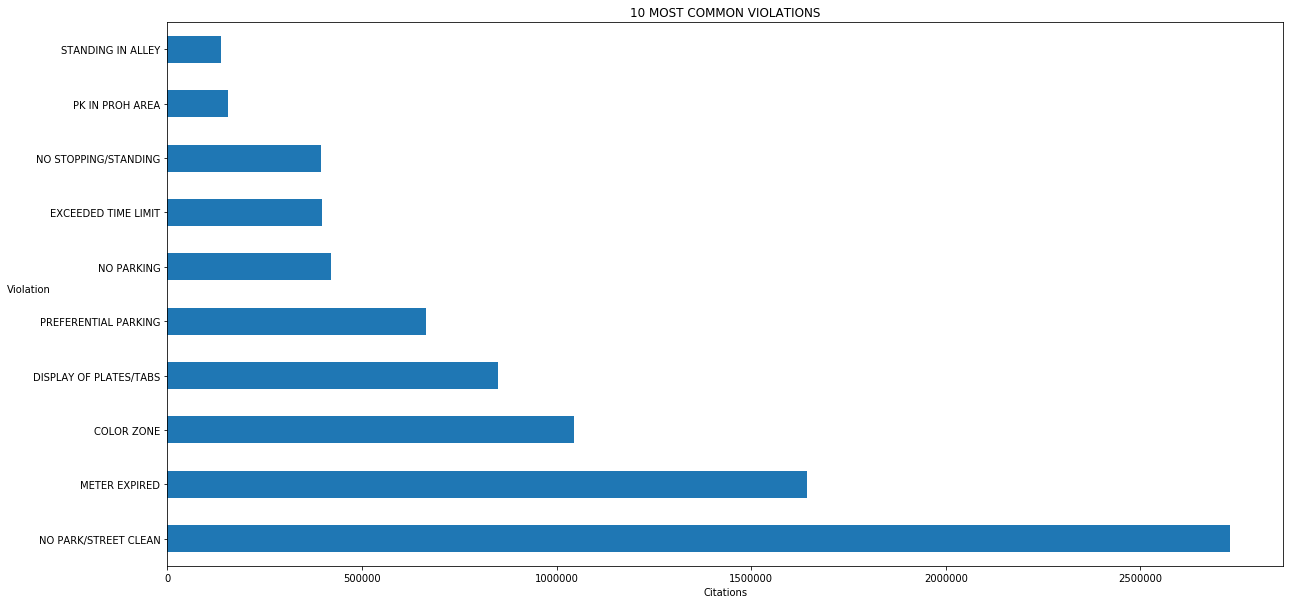

In [45]:
# grab the n most expensive violations and chart them via bar chart

num_violations = groupedby.count()['Fine amount'].sort_values(ascending=False).nlargest(n=10, keep='first')
num_violations.plot.barh(figsize=(20,10))
plt.title("10 MOST COMMON VIOLATIONS")

plt.ylabel("Violation", rotation=0)
plt.xlabel("Citations")

plt.show()


In [22]:
num_violations

Violation Description
NO PARK/STREET CLEAN      2731040
METER EXPIRED             1643530
COLOR ZONE                1043529
DISPLAY OF PLATES/TABS     850622
PREFERENTIAL PARKING       663702
NO PARKING                 420192
EXCEEDED TIME LIMIT        397966
NO STOPPING/STANDING       394810
PK IN PROH AREA            156406
STANDING IN ALLEY          138439
Name: Fine amount, dtype: int64

In [24]:
avg_fine_vio = groupedby.mean()['Fine amount']
avg_fine_vio.sort_values(inplace=False, ascending=False).nlargest(n=10, keep='first')

Violation Description
3 FT. SIDEWALK RAMP               363.000000
DISABLED PARKING                  362.979287
MOB BILBD ADV DISP                255.000000
CARSHARE PARKING                  163.000000
NO STOPPING/ANTI-GRIDLOCK ZONE    162.996548
ABANDONED VEHICLE                 143.000000
PK TRAILER 3                      133.000000
PK OVERSIZED 3RD                  128.000000
BLK RAIL PROHIB                   113.000000
FOR SALE SIGN                     109.687500
Name: Fine amount, dtype: float64

In [27]:
total_revenue = trimmed_df['Fine amount'].sum()
total_revenue

655249460

In [31]:
total_revenue / len(trimmed_df)

69.99971262971056

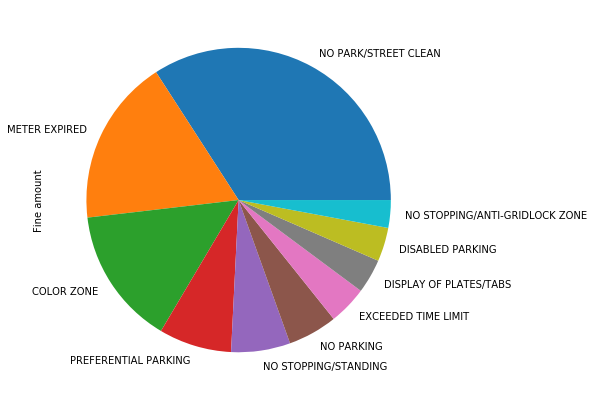

In [42]:
percent_of = np.round((sum_fines / total_revenue)*100, 2)
percent_of.plot.pie(figsize=(20,7))
plt.show()